This practical work, on motion estimation, has 3 different parts, corresponding to three families of algorithms that we have seen in class:
- Block matching algorithms
- Optic flow
- Parametric motion estimation.

You are asked to complete the different algorithms and to try it. Also, please answer to the theoretical questions, in the notebook.

In [1]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/IMA208/TP3_Motion_Estimation_Pour_etudiants')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from me_ssd import me_ssd
from displayMVF import displayMVF
from fracMc import fracMc
from PSNR import PSNR
from me_sad import me_sad
from HornSchunck import HS
from applyAffineMotion import applyAffineMotion
from angle2D import angle2D
from gradient import gradient
from medianFilter import medianFilter
import os

# I - Block matching algorithms
## I-1 - Unregularized algorithms
### I-1-a - Unregularized SSD-based algorithm

First, read the two images 'flower_cif_1.mat' and 'flower_cif_1.mat', which are two consecutive frames of a video sequence. You will have to estimate the motion between these frame, using block matching algorithms.

In [3]:
os.chdir('/content/drive/MyDrive/IMA208/TP3_Motion_Estimation_Pour_etudiants')
im1 = loadmat('flower_cif_1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('flower_cif_2.mat')['im2']
im2 = im2.astype('float')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fca1b0a41c0>)

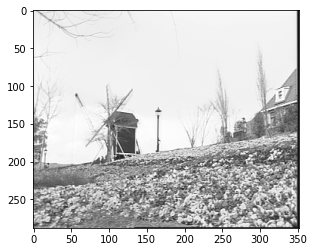

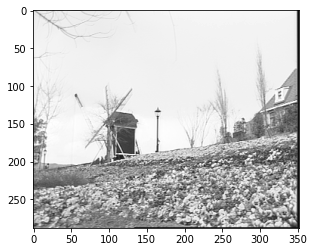

In [4]:
plt.figure(),plt.imshow(im1,cmap='gray')
plt.figure(),plt.imshow(im2,cmap='gray')

First, you will have to encode a block matching using the SSD criterion. Some default values of the algorithm are given below: the number of column and rows in each block, and the search radius.

In [5]:
brow = 16 # Number of rows per block
bcol = 16 # Number of columns per block
search_radius = 2 # Search radius

Code the me_ssd function in the me_ssd file. First, implement the unregularized function.

In [6]:
mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius)

Show the motion vector field using the displayMVF function. Write your remarks. Are there errors? If yes, where and why?

Change the block size and the search area radius. How does it impact your results?

There were some errors when we used a big radius (8), in this case we had vector indicating movements too far away. When we reduced the radius we had a MVF that makes much more sense since our 2 frames are really close (in time) to each other. Reducing the radius we can see a much more detailed MVF.

In [7]:
brow = 16 # Number of rows per block
bcol = 16 # Number of columns per block
search_radius = 8 # Search radius
mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius)

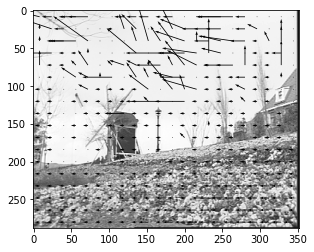

In [8]:
displayMVF(im1,mvf_ssd,brow)

In [9]:
brow = 8 # Number of rows per block
bcol = 8 # Number of columns per block
search_radius = 2 # Search radius
mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius)

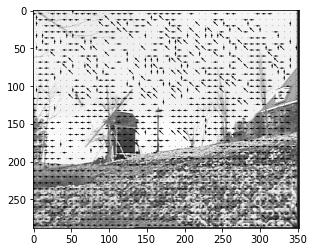

In [10]:
displayMVF(im1,mvf_ssd,brow)

Motion compensation: now that we have computed the movement vector field, we can compute the motion compensated image. Display the motion compensated image. What can you observe ?

Since the two images look a like a lot, we can't see difference between the compensated image and the first frame.

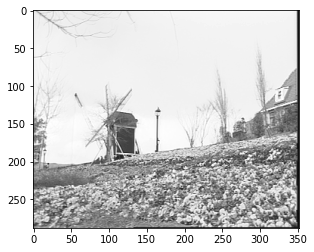

In [11]:
plt.imshow(prediction, cmap='gray')

TO DO : code the motion compensation function

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fca17d1d370>)

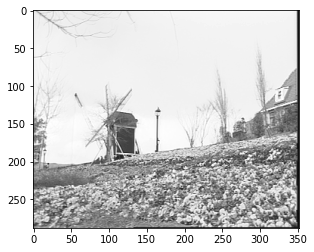

In [12]:
mc_ssd = fracMc(im1,mvf_ssd)
plt.figure(),plt.imshow(mc_ssd,cmap='gray')

Compute the PSNR between the motion compensated and the current images.

What is the definition of PSNR ? Is the PSNR between the motion-compensated image and im2 better than between im1 and im2 ? Explain why.

Code the PSNR function. Compute it using the BM algorithm results, with different parameter values. Explain what you observe.

The PSNR is defined as a logarithmic ratio between the peak signal and the noise. The mathematical formula is 10 * log10(MAX**2/MSE).

As we can see the bigger the MSE the smaller the result of log10(MAX**2/MSE). So a bigger PSNR is a better result. As we can see we got to a bigger PSNR in the comparison between the compensated image and the original, which shows that our compensation worked.

In [13]:
psnr_ssd = PSNR(im2,mc_ssd)
print(psnr_ssd)

21.5866776937282


In [14]:
psnr_ssd = PSNR(im1,im2)
print(psnr_ssd)

18.786509322935075


### I-1-b Unregularized SAD-based algorithm
Now, we will use the SAD as a metric for the block matching algorithm. To do that, implement the me_sad algorithm. Please note that you function should be very similar to me_ssd, except for the metric (as such, as a starting point, you can copy paste what you have proposed for me_ssd).

In [15]:
brow = 16 # Number of rows per block
bcol = 16 # Number of columns per block
search_radius = 8 # Search radius

In [16]:
mvf_sad,prediction =  me_sad(im2, im1, brow, bcol, search_radius)

Show the motion vector field using the displayMVF function. Do you see any difference with the SSD ? Explain.

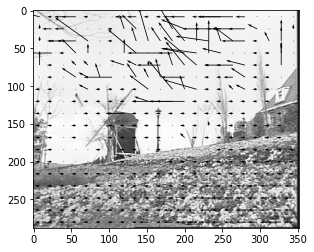

In [17]:
displayMVF(im1,mvf_sad,brow)

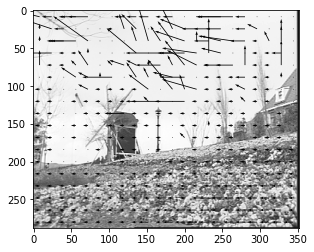

In [18]:
mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius)
displayMVF(im1,mvf_ssd,brow)

Motion compensation: compute the motion compensated image and display it. In addition, compute the PSNR.

Comment the difference observed between SSD and SAD in terms of regularity of the motion vector field, PSNR of the prediction and impact of the block size.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fca17eeb910>)

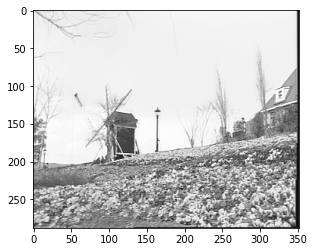

In [19]:
mc_sad = fracMc(im1,mvf_sad)
plt.figure(),plt.imshow(mc_sad,cmap='gray')

There are some really small changes in the regularity of the MVF using these two methods in these two images.

In [20]:
psnr_sad = PSNR(im2,mc_sad)
print(psnr_sad)

22.193271851066754


## I-2- Regularized algorithms
Now, we will add a regularization term to the metrics (SSD and then SAD) we previously used.
### I-2-1- Regularized SSD-based algorithm

TO DO : code the regularized SSD-based algorithm.
For the sake of simplicity, the regularizing function is already given. How does it work and what does it compute?

Try several parameter values, and compare your results with the unregularized algorithms. What can you observe?

We can see a more regularized pattern in the MVF, although I tried several different arrays of lambdas and the best value of lamda with relation to the PSNR was lambda = 0.

0.0


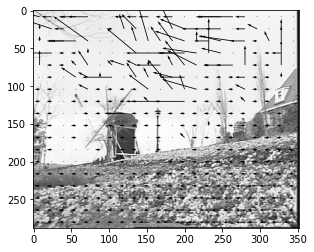

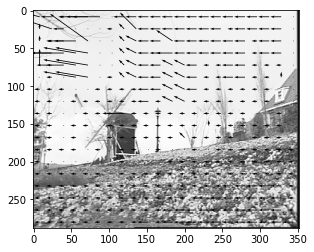

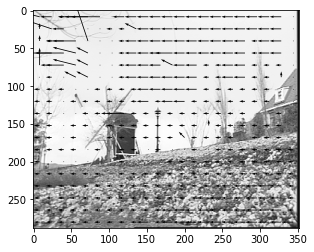

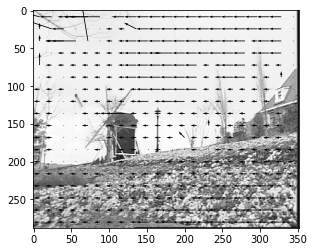

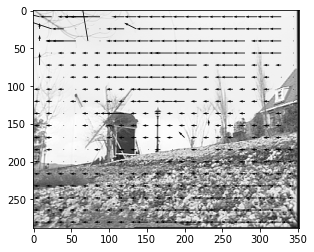

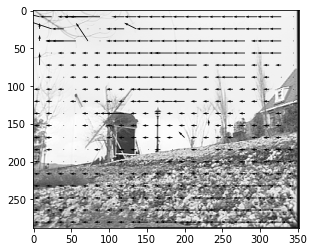

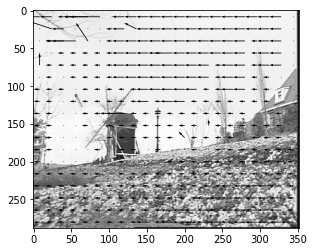

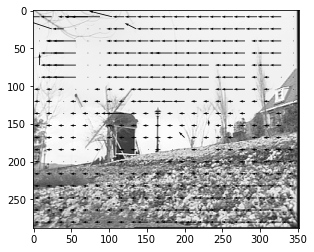

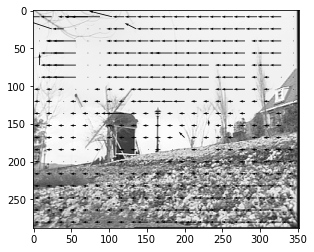

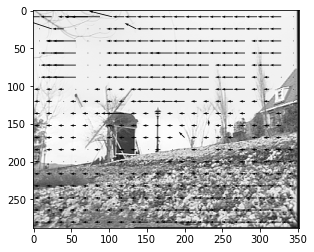

In [21]:
psnrs = []
lambdas = np.linspace(0, 1, 10)
for _lambda in lambdas:
  mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius, _lambda)
  displayMVF(im2,mvf_ssd,brow)
  mc_ssd = fracMc(im1,mvf_ssd)
  psnr = PSNR(im2, mc_ssd)
  psnrs.append(psnr)
best_lambda = lambdas[np.argmax(psnrs)]
print(best_lambda)

### I-2-2- Regularized SAD-based algorithm

TO DO : code the regularized SAD-based algorithm.

Try several parameter values, and compare your results with the unregularized algorithms and the regularized SSD-based algorithm.

The results were the same for SSD and SAD between the two frames that are really close one to the other.

0.0


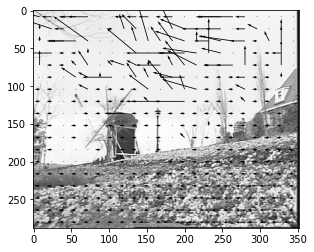

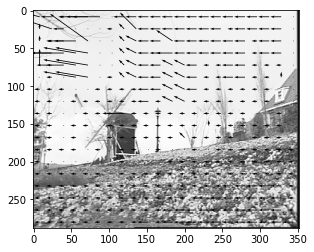

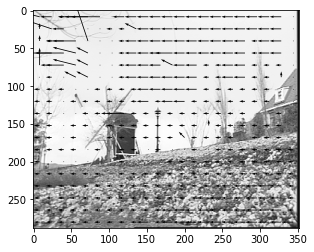

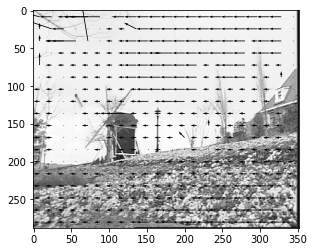

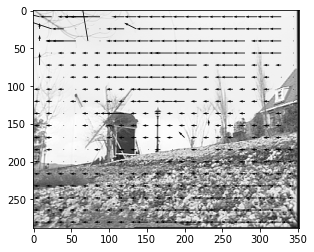

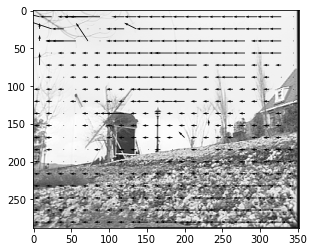

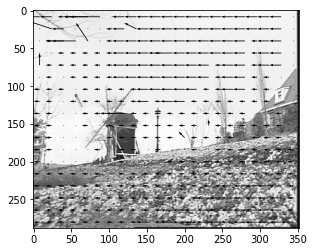

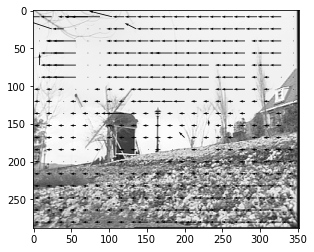

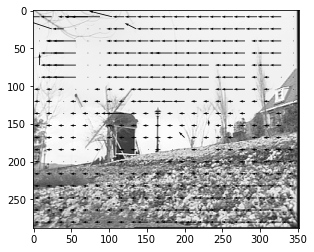

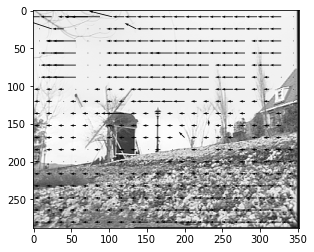

In [22]:
psnrs = []
lambdas = np.linspace(0, 1, 10)
for _lambda in lambdas:
  mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius, _lambda)
  displayMVF(im2,mvf_ssd,brow)
  mc_ssd = fracMc(im1,mvf_ssd)
  psnr = PSNR(im2, mc_ssd)
  psnrs.append(psnr)
best_lambda = lambdas[np.argmax(psnrs)]
print(best_lambda)

# Optical flow

You will now implement the Horn and Schunck algorithm to estimate the optic flow. The two images we will consider here have a more local movement vector field, since we are considering small movements in a face.

In [23]:
im1 = loadmat('akiyo_cif1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('akiyo_cif2.mat')['im2']
im2 = im2.astype('float')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fca179bf850>)

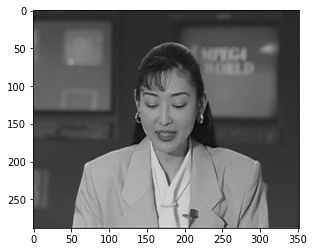

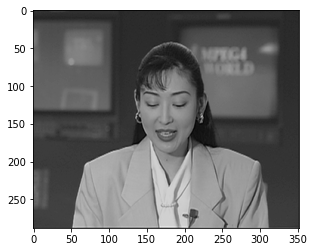

In [24]:
plt.figure(),plt.imshow(im1,cmap='gray')
plt.figure(),plt.imshow(im2,cmap='gray')

Compute the optical flow by filling the gaps in the Horn and Schunck function. You can use the motion field that you estimated before with the block matching algorithms to initialize you algorithm.

As a reminder, the optical flow is implemented by the iterative Horn and Schunck's algorithm:
$$
u^{n+1} = \bar{u}^n - f_x \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
$$
v^{n+1} = \bar{v}^n - f_y \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
where $u^n$ is the value of the $u$ component at the $n$-th iteration, and $\bar{u}$ is the local average of $u$.

In [25]:
brow = 16; bcol=16; search_radius =13;

alpha = 25
ite = 1000

uInitial = np.zeros(im2.shape) # Rem: pay attention to the inversion of the order compare to me_ssd.
vInitial = np.zeros(im2.shape)
[u, v] = HS(im2, im1, uInitial, vInitial, alpha, ite,blur=1.)

Display the motion field and compute the PSNR. Do you observe any improvement compare to block-matching algorithms? Explain. You can test on both the Akiyo and Flowers images.

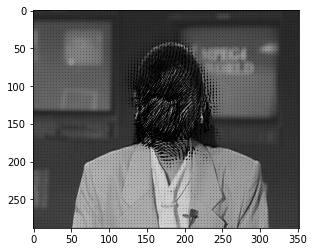

In [26]:
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)

mc_hs = fracMc(im1,mvf_hs)
psnr_hs = PSNR(im2,mc_hs)

In [27]:
psnr_hs

32.0169264440372

## End of TP 1

# III - Parametric estimation
In this last part, we will work on parametric estimation, both using direct and indirect methods.
## III-1- Direct parametric estimation
### III-1-1 Theoretical questions

**Infinite signal**

Let $a: (n,m)\in \mathbb{Z}^2 \rightarrow \mathbb{R}$ be a bi-dimensional signal and $b(n,m)$ a signal of the same type.

Recall the expression of the 2D discrete time Fourier transform (DTFT).

Let us suppose that
$\exists c,d \in \mathbb{Z}^2: \forall n,m \in \mathbb{Z}^2,b(n,m) = a(n+c,m+d)$ (that is, $b$ is a translation of $a$). Compute the DTFT of $b$ as a function of the one of $a$ and of the displacement $(c,d)$.

Show that the ratio between the DTFTs is:
$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$

**Finite signal**

Now, $a: (n,m) \in \{0,1,...,N-1\}^2 \rightarrow \mathbb{R}$ and $b(n,m)$ are both finite signals. In that case, we use the Discrete Fourier Transform (DFT) rather than the DTFT.

Recall the expression of the DF.

Under which hypotheses is the ratio between $a$'s and $b$'s DFT a linear phase signal:
$$
\frac{\hat{A}(k_x,k_y)}{\hat{B}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N^2}\right)
$$



##Answer:
---



**Infinite signal**


Recalling the expression of the 2D DTFT 
\begin{align}
\hat{f}(u, v) = \Sigma \Sigma f(n, m) e^{-i2\pi(un + vm)}
\end{align}

Also, recalling the circular shift property, we have that:
$$
\hat{f}\{f(n - x, m - y)\} = \hat{f}(u, v) \cdot e^{-i2\pi(ux + vy)}
$$

So, taking 
$$
\hat{b}(v_x, v_y) = \hat{f}\{a(n - (-c), m - (-d))\} 
$$

$$
\hat{f}\{a(n - (-c), m - (-d))\} = \hat{f}\{a(n, m)\} \cdot e^{i2\pi(cv_x + d_vy)} = \hat{a}(v_x, v_y) \cdot e^{i2\pi(cv_x + d_vy)}
$$

Therefore, 
$$
\hat{b}(v_x, v_y) = \hat{a}(v_x, v_y) \cdot e^{i2\pi(cv_x + d_vy)}
$$
$$
\frac{\hat{b}(v_x, v_y)}{\hat{a}(v_x, v_y)} = e^{i2\pi(cv_x + d_vy)}
$$




**Finite signal**

The DFT expression is given by:
\begin{align}
\hat{F}(u, v) = \frac{1}{MN}\Sigma \Sigma f(n, m) e^{-i2\pi(\frac{un}{N} + \frac{vm}{M})}
\end{align}

Assuming $ M = N $:
\begin{align}
\hat{F}(u, v) = \frac{1}{N²}\Sigma \Sigma f(n, m) e^{-i2\pi(\frac{1}{N}(un + um))}
\end{align}

The circular shift property for $ M = N $ yields:

$$
\hat{F}\{f(n - x, m - y)\} = \hat{F}(u, v) \cdot e^{-i2\pi\frac{1}{N}(ux + vy)}
$$

So, taking 
$$
\hat{B}(v_x, v_y) = \hat{F}\{a(n - c, m - d)\} 
$$

$$
\hat{F}\{a(n - c, m - d)\}  = \hat{F}\{a(n, m)\} \cdot e^{-i2\pi\frac{1}{N}(cv_x + dv_y)} = \hat{a}(v_x, v_y) \cdot e^{-i2\pi\frac{1}{N}(cv_x + dv_y)}
$$

Therefore, 
$$
\frac{\hat{A}(v_x, v_y)}{\hat{B}(v_x, v_y)} = e^{\frac{i2\pi(cv_x + dv_y)}{N}}
$$
In order to the given proposition be true we have that: 
$$
\frac{(cv_x + dv_y)}{N} = \frac{(cv_x + dv_y)}{N²}
$$
Assuming N > 1, we would need to have $ c = d = 0$


### III-1-2 Practical part
First, start to work on the 'ball.mat' image. We will apply a translation to this image and try to estimate the parameter of the translation.

Try by either adding of not some noise into the image.

In [28]:
#im1 = loadmat('ball.mat')['im1']
#im1 = im1.astype('float')

im1 = loadmat('lena.mat')['im1']
im1 = im1.astype('float')

N, M = np.shape(im1)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fca1b1471c0>)

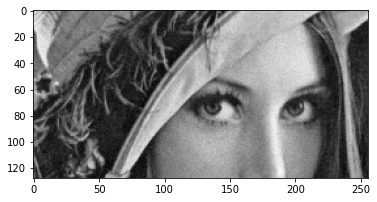

In [29]:
# Potentially add noise to the image
sigma = 5
im1 = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
plt.figure(),plt.imshow(im1,cmap='gray')

In the following, we apply a translation to the image.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fca17c88400>)

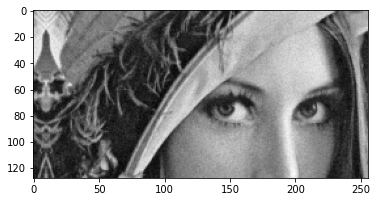

In [30]:
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1,b)
plt.figure(),plt.imshow(im2,cmap='gray')

Compute the FFT of the two images. Using the indications given in the theroretical part, describe a method with which you can find the parameters of the translation from the two FFTs.

In [31]:
IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

In [32]:
phi = angle2D(IM1/IM2)

Display phi. Is it a linear plane and why?

Phi is the unwrapped phase difference of the two signals. As we've seen before, the value of phi could be expressed as $(cv_x + dv_y)$ which yields a plan. We can get to the values of the translation arguments $c$ and $d$ by finding the inclination of the plan.

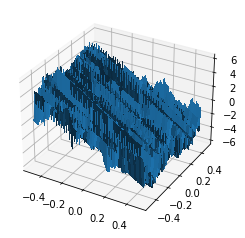

In [33]:
fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx, fy, phi, linewidth=0, antialiased=False)

Translation estimation: to estimate the parameters of the translation, we are now looking for the slope of the plane.

Method 1: estimate it using the median of the gradient. To do that, complete the gradient function.

In [34]:
gx, gy = gradient(phi,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)

In [35]:
print(GX)
print(GY)

-9.395661720967393
-1.9570953283092436


Method 2: the code below computes the least Square planar approximation of phi, enabling you how to estimate the parameters of the translation. Explain how it works.

In [36]:
import numpy as np

def medianFilter(img, k=3):
    # Applies a median filter to an input image using a square window of size k x k
    
    # Compute the padding size for the input image
    pad_size = k // 2
    
    # Pad the input image with zeros
    padded_img = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    
    # Initialize the output filtered image
    filtered_img = np.zeros_like(img)
    
    # Iterate over each pixel in the output image
    for i in range(pad_size, img.shape[0] + pad_size):
        for j in range(pad_size, img.shape[1] + pad_size):
            # Extract the subimage corresponding to the current window
            window = padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            
            # Compute the median of the window
            median_val = np.median(window)
            
            # Set the corresponding pixel in the filtered image to the median value
            filtered_img[i-pad_size, j-pad_size] = median_val
            
    return filtered_img


In [37]:
phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)

In [38]:
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

In [39]:
print(bEst)

[-8.21558284  0.06994899]


Relaunch the above code:
- with and without noise
- with the lena image, instead of the ball image.

Each time, are you able to correctly estimate the translation? Why? Comment your results.

With noise and the lena image we got to less precise results, since this method is based on estimations of the plan phi. When we use a more complex image and that fulfills all the grid we have some disturbances in the plan, also, applying noise causes disturbances in this plan, as so we don't get to precise results in the translation parameters.

# III-2-Indirect parametric estimation
In this last part, we will perform indirect parametric estimation. The movement vector field will be estimated by 1) block matching; 2) optic flow. Each time, you will then estimate the translation by taking the median of the estimated vector field.

Perform the experiment without and with noise (you can then take sigma = 2).

Finally, compare all the parametric estimation methods when the translation values are not integer.

These methods didn't perform good estimations for the parametric estimation by the median of the MVF, neither with and without noise. 

Finally, the method that performed the best for parametric motion estimation when the values are not integers were the direct method.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fca1768a3a0>)

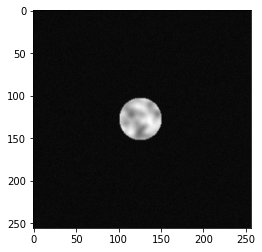

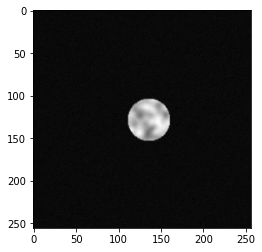

In [40]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')

#im1 = loadmat('lena.mat')['im1']
#im1 = im1.astype('float')

N, M = np.shape(im1)
# Potentially add noise to the image
sigma = 2
im1 = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
plt.figure(),plt.imshow(im1,cmap='gray')
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1,b)
plt.figure(),plt.imshow(im2,cmap='gray')

-5.0
-4.5


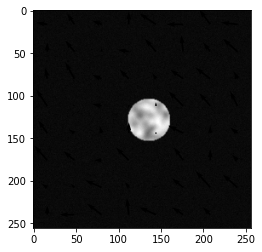

In [41]:
lamb = 0
mvf,prediction = me_ssd(im2,im1,32,32,10,lamb)
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

Estimation with optic flow

-3.850925891611481
-3.8989838905517598


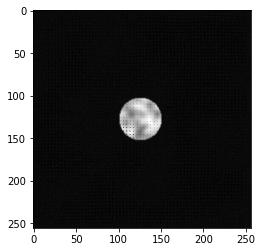

In [42]:
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)